# Lab 8: Define and Solve an ML Problem of Your Choosing

In [21]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix



In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the book review data set.
2. I will be predicting if a book's review will be positive or not. The label is "Positive Review".
3. This is a supervised learning problem because we already know the correct label for each input and a sentiment analysis application. Also, it is a text classification problem because we are classifying the feature "Review" on whether or not it is a positive review. Lastly, it is a binary classification problem because whether or not a book's review is positive or not is True or False, 1 or 0.
4. The feature is "Review" which is the only other column besides the label.
5. This is an important problem because it directly impacts reputation, customer experience and revenue. A company can create value with a model that predicts this label since they can enhance products, save time and scale analysis.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.columns

Index(['Review', 'Positive Review'], dtype='object')

In [5]:
df["Review"].dtypes

dtype('O')

In [11]:
df["Positive Review"].dtypes

dtype('bool')

In [12]:
df["Review"].describe

<bound method NDFrame.describe of 0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object>

In [13]:
df["Positive Review"].describe

<bound method NDFrame.describe of 0        True
1        True
2        True
3       False
4        True
        ...  
1968     True
1969     True
1970     True
1971    False
1972     True
Name: Positive Review, Length: 1973, dtype: bool>

In [6]:
df.head

<bound method NDFrame.head of                                                  Review  Positive Review
0     This was perhaps the best of Johannes Steinhof...             True
1     This very fascinating book is a story written ...             True
2     The four tales in this collection are beautifu...             True
3     The book contained more profanity than I expec...            False
4     We have now entered a second time of deep conc...             True
...                                                 ...              ...
1968  I purchased the book with the intention of tea...             True
1969  There are so many design books, but the Graphi...             True
1970  I am thilled to see this book being available ...             True
1971  As many have stated before me the book starts ...            False
1972  I love this book! It is a terrific blend of ha...             True

[1973 rows x 2 columns]>

In [7]:
df.shape

(1973, 2)

In [7]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [8]:
df["Positive Review"].value_counts(normalize=True)

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64

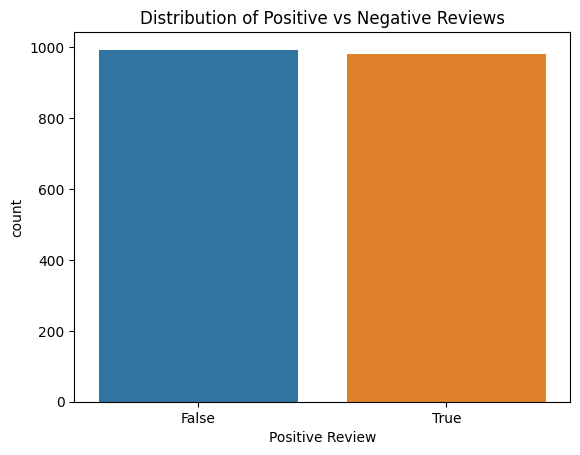

In [9]:
sns.countplot(data=df, x='Positive Review')
plt.title("Distribution of Positive vs Negative Reviews")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. There is no new feature list and none were removed.
2. Text preprocessing, Text vectorization, TF-IDF or CountVectorizer Split data into training/testing sets, handle class imbalance using resampling techniques
3. Logistic Regression
4. Preprocess text, use a pipeline to streamline vectorization and modeling, evaluate using accuracy, precision, recall, and F1-score, improve using grid search for hyperparameters or different vectorizers.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [36]:
# Split into features and labels
X = df['Review']
y = df['Positive Review']
# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', lowercase=True)),
    ('clf', LogisticRegression(max_iter=1000))  # try MultinomialNB as well
])

In [18]:
# Fit to training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [35]:
# Predict on test data
y_pred = pipeline.predict(X_test)
# Evaluate
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.83      0.80      0.82       199\n        True       0.81      0.83      0.82       196\n\n    accuracy                           0.82       395\n   macro avg       0.82      0.82      0.82       395\nweighted avg       0.82      0.82      0.82       395\n'

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

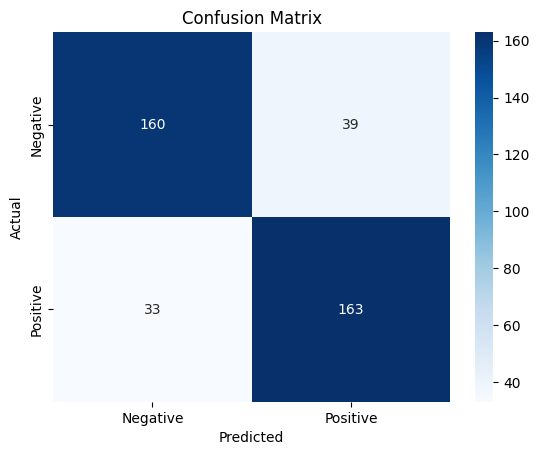

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
from sklearn.naive_bayes import MultinomialNB


In [24]:
# New pipeline with Naive Bayes
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', lowercase=True)),
    ('clf', MultinomialNB())
])


In [25]:
# Fit and evaluate
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

In [26]:
classification_report(y_test, y_pred_nb)

'              precision    recall  f1-score   support\n\n       False       0.76      0.84      0.80       199\n        True       0.82      0.73      0.77       196\n\n    accuracy                           0.79       395\n   macro avg       0.79      0.79      0.79       395\nweighted avg       0.79      0.79      0.79       395\n'

In [27]:
from sklearn.model_selection import GridSearchCV


In [33]:
# Define search space
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 5],
    'clf__C': [0.1, 1, 10]
}


In [29]:

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'tfidf__min_df': [1, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1')

In [30]:
grid.best_params_


{'clf__C': 1, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}

In [31]:
# Evaluate tuned model
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [34]:
classification_report(y_test, y_pred_tuned)


'              precision    recall  f1-score   support\n\n       False       0.84      0.80      0.82       199\n        True       0.80      0.84      0.82       196\n\n    accuracy                           0.82       395\n   macro avg       0.82      0.82      0.82       395\nweighted avg       0.82      0.82      0.82       395\n'

Analysis: To solve the problem of predicting whether a book review is positive or not, three different models were evaluated: a baseline logistic regression model, a multinomial Naive Bayes model, and a tuned logistic regression model using grid search.

The baseline logistic regression model achieved an accuracy of 82 percent, with precision and recall values of approximately 83 percent for negative reviews and 81 percent for positive reviews. The F1 scores were balanced at 82 percent for both classes. This suggests that the baseline model performed well overall, accurately identifying both positive and negative reviews.

The multinomial Naive Bayes model performed slightly worse, with an overall accuracy of 79 percent. While it had a relatively high precision of 82 percent for positive reviews, its recall dropped to 73 percent, indicating it missed more actual positive reviews. For negative reviews, it had higher recall at 84 percent but lower precision at 76 percent, suggesting it was more likely to incorrectly label some reviews as negative. Overall, the performance was acceptable but less balanced compared to logistic regression.

The tuned logistic regression model, which used grid search to optimize the TFIDF vectorizer and regularization strength, also achieved an accuracy of 82 percent. However, the precision and recall values were more evenly distributed between the two classes, both around 80 to 84 percent. The best parameters found during grid search included using both unigrams and bigrams, removing rare terms that appeared in fewer than 5 reviews, and keeping the regularization parameter C equal to 1.

Overall, logistic regression both baseline and tuned outperformed Naive Bayes in this binary text classification task. The tuning process improved the balance between precision and recall slightly, indicating better generalization. This model is effective at identifying sentiment in book reviews and could be useful for platforms that want to automate review analysis, filter inappropriate content, or gain insights into customer feedback at scale.